# TensorFlow Crash Course for Developers

## What is TensorFlow?

 - A tool for building computational graphs
 - It allows for the graph to be distributed over many many CPUs/GPUs
 - Up till now TensorFlow has been a low level Lib 
 - This is changing going forward 
 - TensorFlow has fast become the standard library for Deep Learning

## TensorFlow the big concepts

 in TF is a computational graph with operations on it
 
 
 
 ### 1. Graph
 
         - Everything must be built on the graph before you excute. 
         - We can do this in a variety of languages
         - The graph is run it will be in C++
         - We use Python to define the graph but then it gets turned into c++/CUDA etc for running
         - With new XLA TF will edit/create an optimized graph
         
 ### 2. Operations 
 
         - Operations are performed on a graph
         - Standard math operations
         - Allow a high level of granularity in your model

 ### 3. Sessions 
 
         - Sessions execute the graph
         - Nothing is run till you init and run a session
         
         
 ### 4. TensorBoard
 
         - Gives us a visual representation of our model 
         - Gives us stats about our training variables like loss accuracy etc
         

### Importing TensorFlow and checking the version

In [1]:
import tensorflow as tf
tf.__version__

'1.0.0'

### Setting up the Graph

In [2]:
# The graph
tf.reset_default_graph()
graph = tf.get_default_graph()

In [3]:
# Reseting Tensorboard
sess = tf.Session()
#!rm -rf log_simple_graph
#!rm -rf matrix_graph
#!rm -rf log_simple_stat

### Creating some example operations

Simple Neuron

<img src="./diagram12.gif" style="width:700px;">

In [4]:
# sample input to make graph above
input_a = tf.constant(4., dtype =tf.float32 ,name='a')
input_b = tf.constant(3., dtype =tf.float32, name='b')

#simple_addition operator
c = tf.add(input_a,input_b,name='a_plus_b')

#simple_mulitplication
d = tf.multiply(input_a,input_b,name='a_mul_b')

#
e = tf.multiply(c,d,name='c_mul_d')

In [5]:
# without a running a session we don't get any values
print(c)

Tensor("a_plus_b:0", shape=(), dtype=float32)


Lets look inside these operation objects

In [6]:
#Examining our operations
operations = graph.get_operations()
for operation in operations:
    print(operation.name," ", operation.type)

a   Const
b   Const
a_plus_b   Add
a_mul_b   Mul
c_mul_d   Mul


In [7]:
operations[-2].node_def

name: "a_mul_b"
op: "Mul"
input: "a"
input: "b"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

In [8]:
### Runnning the Graph in a session
print(sess.run(c))

7.0


In [9]:
### Runnning the Graph in a session
summary_writer = tf.summary.FileWriter('log_simple', sess.graph)
sess.run(e)

84.0

In [10]:
!tensorboard --logdir=log_simple

Starting TensorBoard b'41' on port 6006
^C
Traceback (most recent call last):
  File "/Users/samwitteveen/anaconda/envs/tf01/bin/tensorboard", line 11, in <module>
    sys.exit(main())
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/site-packages/tensorflow/tensorboard/tensorboard.py", line 151, in main
    tb_server.serve_forever()
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/socketserver.py", line 232, in serve_forever
    ready = selector.select(poll_interval)
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt


# What is a Tensor


<img src="./diagram5g.png" style="width:800px;">

multi dimensional array/matrix



In [12]:
# The graph
tf.reset_default_graph()
graph = tf.get_default_graph()
sess = tf.Session()

!rm -rf matrix_graph
!rm -rf log_simple


#tensor_a = tf.random_normal(shape=[3,3], mean=0.0,stddev=1.0, dtype=tf.float32,name='tensor_a')
tensor_a = tf.constant([[4,5,6],[1,3,5],[3,1,3]],shape=[3,3], dtype =tf.float32 ,name='tensor_b')
tensor_b = tf.constant([[4.,3,5],[12,3,45],[63,41,3]],shape=[3,3], dtype =tf.float32 ,name='tensor_b')

tensor_matrix_mul = tf.matmul(tensor_a,tensor_b)

In [13]:
# getting tensor shape  
tensor_a.get_shape()

TensorShape([Dimension(3), Dimension(3)])

In [14]:
### Runnning the Graph in a session
print(sess.run(tensor_a))

[[ 4.  5.  6.]
 [ 1.  3.  5.]
 [ 3.  1.  3.]]


In [15]:
#sess = tf.Session()
print(sess.run(tensor_b))

[[  4.   3.   5.]
 [ 12.   3.  45.]
 [ 63.  41.   3.]]


$$ 
\begin{bmatrix}
    4 &  5 &  6 \\
    1  & 3 &  5 \\
    3  & 1 &  3 \\
\end{bmatrix}
•
\begin{bmatrix}
    4 &  3 &  5 \\
    12 &  3 &  45 \\
    63 &  41 &  3 \\
\end{bmatrix}
=
\begin{bmatrix}
    454 &  273 &  263 \\
    355 &  217 &  155 \\
    213 & 135 &  69 \\
\end{bmatrix}
$$

In [16]:
print(sess.run(tensor_matrix_mul))

[[ 454.  273.  263.]
 [ 355.  217.  155.]
 [ 213.  135.   69.]]


In [17]:
### Runnning the Graph on tensor board
summary_writer = tf.summary.FileWriter('matrix_graph', sess.graph)
!tensorboard --logdir=matrix_graph

Starting TensorBoard b'41' on port 6006
^C
Traceback (most recent call last):
  File "/Users/samwitteveen/anaconda/envs/tf01/bin/tensorboard", line 11, in <module>
    sys.exit(main())
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/site-packages/tensorflow/tensorboard/tensorboard.py", line 151, in main
    tb_server.serve_forever()
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/socketserver.py", line 232, in serve_forever
    ready = selector.select(poll_interval)
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt


## Building your first network

In [18]:
import tensorflow as tf
tf.__version__

'1.0.0'

## MNIST Model with Pure TensorFlow

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
# Import MNIST from TF Examples
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [21]:
X_train = X_train[:50000]
Y_train = Y_train[:50000]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


### MNIST Image Tensor X_train

<img src="./diagram4f.png" style="width:550px;">
<img src="./diagram6d.png" style="width:550px;">

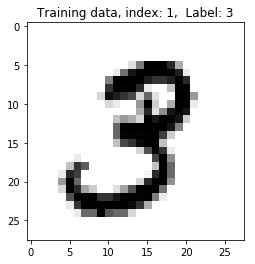

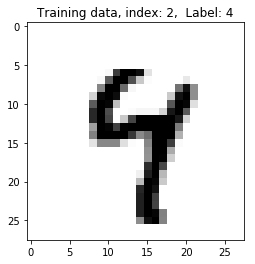

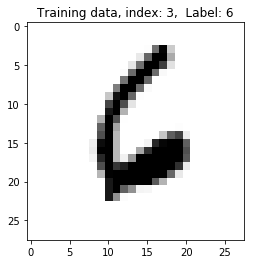

In [23]:
# Method for displaying the number as a picture

def show_digit(index):
    label = Y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = X_train[index].reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
def show_predicted_digit(image, pred, label):
    # Reshape 784 array into 28x28 image
    image = image.reshape([28,28])
    plt.title('Original Image, Pred: %d,  True Label: %d' %(pred, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(1)
show_digit(2)
show_digit(3)

#### Batching allows TF to streamline a cimputation for the processors eg. GPU

In [24]:
# Create a batch of 64 images and their labels
batch_X, batch_Y = mnist.train.next_batch(64)

In [25]:
batch_X.shape

(64, 784)

<img src="./diagram3c.gif" style="width:750px;">

### Setting up our Network Hyper Parameters

In [49]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 2
batch_size = 100
display_step = 1  # for how often to print out our results
model_path = "./talk_save/model1.ckpt" #"./talk_save/model.ckpt"
alt_model_path = "./talk_save/model.ckpt" #"./talk_save/model.ckpt"


# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

In [50]:
# The graph
tf.reset_default_graph()
#!rm -rf log_simple_graph
!rm -rf matrix_graph
#!rm -rf log_simple_graph/3


# tf Graph input
with tf.name_scope('Inputs') as scope:
    x = tf.placeholder("float", [None, n_input],name='x_input')
    y = tf.placeholder("float", [None, n_classes],name='labels')

In [51]:
# Create model
def multilayer_perceptron(x):
    
    with tf.name_scope('hidden_01') as scope:
        # Hidden layer 01 with RELU activation
        
        #weights and bias tensor
        h1weight = tf.Variable(tf.truncated_normal([n_input, n_hidden_1],stddev=0.1),name='h1_weights')
        h1bias = tf.Variable(tf.truncated_normal([n_hidden_1],stddev=0.1),name='b1_bias')
        
        #hidden layer 01 Ops
        layer_1 = tf.add(tf.matmul(x, h1weight), h1bias,name='Layer1_matmul')  # adding (x•w1) + bias1)
        layer_1 = tf.nn.relu(layer_1, name='Layer1_Relu') #activation Relu passes anything above 0 and blocks negative
        
        #tensorboard histograms for layer 01
        tf.summary.histogram('weights_h1',h1weight)
        tf.summary.histogram('bias_h1',h1bias)
        
    with tf.name_scope('hidden_02') as scope:
        # Hidden layer 02 with RELU activation
        h2weights = tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],stddev=0.1),name='h2_weights')
        h2bias = tf.Variable(tf.truncated_normal([n_hidden_2],stddev=0.1),name='b2_bias')
        
        layer_2 = tf.add(tf.matmul(layer_1, h2weights), h2bias,name='Layer2_add')
        layer_2 = tf.nn.relu(layer_2, name='Layer2_Relu')
        #tensorboard histograms
        tf.summary.histogram('weights_h2',h2weights)
        tf.summary.histogram('bias_h2',h2bias)
        
    with tf.name_scope('output_layer') as scope:
        # Logits layer with linear activation
        output_weights = tf.Variable(tf.truncated_normal([n_hidden_2, n_classes],stddev=0.1),name='output_weights')
        output_bias = tf.Variable(tf.truncated_normal([n_classes],stddev=0.1),name='out_bias')
        
        logits_layer = tf.add(tf.matmul(layer_2, output_weights), output_bias,name='logits')

    return logits_layer

In [52]:
pred = multilayer_perceptron(x)

In [53]:
# Define loss and optimizer
with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y, logits=pred ))   #compute the error against the correct results

with tf.name_scope('train'):    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) # optimizer makes changes to the weights and bias to reduce loss
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

In [54]:
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

In [55]:
### Runnning the Graph on tensor board
file_writer = tf.summary.FileWriter('log_simple_graph/9', sess.graph)

tf.summary.scalar("accuracy", accuracy)
tf.summary.scalar("loss", loss)

summary_op = tf.summary.merge_all()

### Train the Network by running the Session


In [56]:
%%time

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c,summary = sess.run([optimizer, loss,summary_op], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            #write to file TensorBoard variables
            file_writer.add_summary(summary, epoch  + i)
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "Loss =", \
                "{:.9f}".format(avg_cost))
    print ("Optimization Finished!")
    

    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print ("Model saved to: %s" % save_path)
 

Epoch: 0001 Loss = 1.477629425
Epoch: 0002 Loss = 0.731560423
Optimization Finished!
Model saved to: ./talk_save/model1.ckpt
CPU times: user 53.8 s, sys: 2.27 s, total: 56.1 s
Wall time: 24.1 s


### Testing against our Test Data

In [57]:
with tf.Session() as sess:
    sess.run(init)
    
    # Restore model weights from previously saved model
    load_path = saver.restore(sess, model_path)
    print ("Model restored from file: %s" % save_path)
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Model restored from file: ./talk_save/model1.ckpt
Accuracy: 0.741


In [58]:
!tensorboard --logdir=log_simple_graph

Starting TensorBoard b'41' on port 6006
^C
Traceback (most recent call last):
  File "/Users/samwitteveen/anaconda/envs/tf01/bin/tensorboard", line 11, in <module>
    sys.exit(main())
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/site-packages/tensorflow/tensorboard/tensorboard.py", line 151, in main
    tb_server.serve_forever()
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/socketserver.py", line 232, in serve_forever
    ready = selector.select(poll_interval)
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt


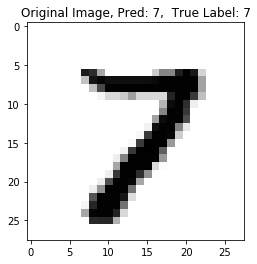

In [39]:
def predict_image_from_test(imageNumber):
    imvalue = X_test[imageNumber]
    trueValue = np.argmax(Y_test[imageNumber],0)
    with tf.Session() as sess:
        sess.run(init)
        # Restore model weights from previously saved model
        load_path = saver.restore(sess, model_path)
        # Predict model 1 image batch size = 1
        vector = sess.run(pred, feed_dict={x: [imvalue]})
        #print(vector[0])
        pred_label = sess.run(tf.argmax(vector[0],0))
        #show image and result
        show_predicted_digit(imvalue, pred_label, trueValue)
        
predict_image_from_test(34)

## Tensor Board

#### clear the graph so you can start from scratch

tf.reset_default_graph()  
sess = tf.Session()

#### create a file writer

file_writer = tf.summary.FileWriter('log_simple_graph/2', sess.graph)

#### save a summary of a continuous scalar value 

tf.summary.scalar("accuracy", accuracy)  
tf.summary.scalar("loss", loss)  

#### save a summary of a continuous value as histogram

tf.summary.histogram('weights_h1',h1weight)  
tf.summary.histogram('bias_h1',h1bias)  

#### merge the summaries to one model

summary_op = tf.summary.merge_all()

#### logging the info when training

file_writer.add_summary(summary, epoch  + batch)  
summary = sess.run([optimizer, loss,summary_op], feed_dict={x: batch_x, y: batch_y})

#### Running the TensorBoard 
!tensorboard --logdir=log_simple_graph  
(!) is for jupyter to access the command line  
(log_simple_graph) is the folder with the graph in it

## Lazy Sentiment Analysis Network

Using the same model as before lets see how it performs on a totally different type of problem

In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
from collections import Counter

Read IMDB movie reviews dataset

In [61]:
reviews = pd.read_csv('./imdb_data/reviews.txt', header=None)
labels = pd.read_csv('./imdb_data/labels_ohe.csv', header=None)

In [62]:
len(reviews)

25000

In [63]:
reviews.head()
reviews[0][3]

'airport    starts as a brand new luxury    plane is loaded up with valuable paintings  such belonging to rich businessman philip stevens  james stewart  who is flying them  a bunch of vip  s to his estate in preparation of it being opened to the public as a museum  also on board is stevens daughter julie  kathleen quinlan   her son . the luxury jetliner takes off as planned but mid  air the plane is hi  jacked by the co  pilot chambers  robert foxworth   his two accomplice  s banker  monte markham   wilson  michael pataki  who knock the passengers  crew out with sleeping gas  they plan to steal the valuable cargo  land on a disused plane strip on an isolated island but while making his descent chambers almost hits an oil rig in the ocean  loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the bermuda triangle . with air in short supply  water leaking in  having flown over    miles off course the problems mount for the s

In [64]:

total_counts = Counter()
for i,row in reviews.iterrows():
    total_counts.update(row[0].split(' '))

print("Total words in data set: ", len(total_counts))

Total words in data set:  74074


In [65]:
vocab = sorted(total_counts, key=total_counts.get, reverse=True)[:10000]
print(vocab[70:80])

['we', 'were', 'me', 'well', 'than', 'much', 'get', 'bad', 'been', 'people']


In [66]:
print(vocab[77], ': ', total_counts[vocab[77]])

bad :  9308


In [67]:
word2idx = {word: i for i, word in enumerate(vocab)} #dictionary comprehension 

In [68]:
def text_to_vector(text):
    word_vector = np.zeros(len(vocab), dtype=np.int_)
    for word in text.split(' '):
        idx = word2idx.get(word,None)
        if idx is None:
            continue
        else:
            word_vector[idx] = 1 # was += 1
    return np.array(word_vector)


In [69]:
text_to_vector('There were lots of good movies and stars this year')[:65]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
word_vectors = np.zeros((len(reviews), len(vocab)), dtype=np.int_)
for ii, (_, text) in enumerate(reviews.iterrows()):
    word_vectors[ii] = text_to_vector(text[0])

In [71]:
# Printing out the first 5 word vectors
print(word_vectors[:3, :25])
print(reviews[:3])

[[1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1]]
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...


In [72]:
word_vectors.shape


(25000, 10000)

In [73]:

number_of_records = len(labels)
shuffle = np.arange(number_of_records)
np.random.shuffle(shuffle)
test_fraction = 0.9

#making a train / test split
train_split, test_split = shuffle[:int(number_of_records*test_fraction)], shuffle[int(number_of_records*test_fraction):]
trainX, trainY = word_vectors[train_split,:], labels.values[train_split,:]
testX, testY = word_vectors[test_split,:], labels.values[test_split]

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
type(testX[0][0])


(22500, 10000)
(22500, 2)
(2500, 10000)
(2500, 2)


numpy.int64

In [74]:
#making a quick batch system
def get_next_batch(batch_size,i):
    return trainX[(i*batch_size):((i+1)*batch_size)].astype('float32'),trainY[(i*batch_size):((i+1)*batch_size)].astype('float32')

# Testing
batch_x, batch_y = get_next_batch(100,3)
batch_x[0:5]
batch_y.shape

(100, 2)

In [108]:
# Training Hyper Parameters 
learning_rate = 0.001 
training_epochs = 8
batch_size = 100
display_step = 2  # for how often to print out our results
model_path = "./talk_save/model_sentiment.ckpt"

# Network Parameters
n_input = 10000 # we now have 10k vectors of our words
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes = 2 # 2 classes for predicting positive or negative

In [109]:
# The graph
tf.reset_default_graph()
sess = tf.Session()
#!rm -rf log_simple_graph


# tf Graph input
x = tf.placeholder("float", [None, n_input],name='X_Input')
y = tf.placeholder("float", [None, n_classes],name='Y_Input')

In [116]:
# Create model
def multilayer_perceptron(x, weights, biases):
    
    # Hidden layer 01 with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])  # adding (x + w1 + bias1)
    layer_1 = tf.nn.relu(layer_1, name='Layer1_Relu') #activation
    
    # Hidden layer 02 with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2, name='Layer2_Relu')
    
    # Logits layer with linear activation
    logits_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    #logits_layer = tf.nn.softmax(logits_layer)
    return logits_layer

In [117]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1],stddev = 0.1)),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],stddev = 0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden_2, n_classes],stddev = 0.1))
}
biases = {
    'b1': tf.Variable(tf.ones([n_hidden_1])/10),
    'b2': tf.Variable(tf.ones([n_hidden_2])/10),
    'out': tf.Variable(tf.ones([n_classes])/10)
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)


In [118]:
# Define loss and optimizer

# this is were we compute error against the correct results
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))*100

# optimizer made to change weights and biases to optimize cost
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) 
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# Initializing the variables
init = tf.global_variables_initializer()

In [119]:
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

In [120]:
summary_y = tf.summary.scalar('output', y)
file_writer = tf.summary.FileWriter('log_simple_sentiment')

In [121]:
%%time
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(reviews)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = get_next_batch(100,i)
            #print(batch_x[0])
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, loss], feed_dict={x: batch_x, y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "Loss =", \
                "{:.9f}".format(avg_cost))
    print ("Training Finished!")
    
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print ("Model saved in file: %s" % save_path)

Epoch: 0001 Loss = nan
Epoch: 0003 Loss = nan
Epoch: 0005 Loss = nan
Epoch: 0007 Loss = nan
Training Finished!
Model saved in file: ./talk_save/model_sentiment.ckpt
CPU times: user 9min 31s, sys: 29.7 s, total: 10min 1s
Wall time: 1min 56s


In [122]:
with tf.Session() as sess:
    sess.run(init)
    
    # Restore model weights from previously saved model
    load_path = saver.restore(sess, model_path)
    print ("Model restored from file: %s" % save_path)
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", accuracy.eval({x: testX, y: testY}))

Model restored from file: ./talk_save/model_sentiment.ckpt
Accuracy: 0.8812


In [ ]:
def predict_text(text_string):
    textVec= text_to_vector(text_string)
    with tf.Session() as sess:
        sess.run(init)
        # Restore model weights from previously saved model
        load_path = saver.restore(sess, model_path)
        # Predict model 1 image batch size = 1
        vector = sess.run(pred, feed_dict={x: [textVec]})
        #print(vector[0])
        pred_label = sess.run(tf.argmax(vector[0],0))
        #print the label
        if pred_label == 1: 
            print('Positive')
        else:
            print('Negative')
        
predict_text("lion is a great movie to watch this year")

predict_text("this was worst experience in a long")

In [ ]:
# Create model
def multilayer_perceptron(x, weights, biases):
    
    with tf.name_scope('hidden_01') as scope:
        # Hidden layer 01 with RELU activation
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'],name='Layer1_matmul')  # adding (x + w1 + bias1)
        layer_1 = tf.nn.relu(layer_1, name='Layer1_Relu') #activation
        
    with tf.name_scope('hidden_02') as scope:
        # Hidden layer 02 with RELU activation
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'],name='Layer2_add')
        layer_2 = tf.nn.relu(layer_2, name='Layer2_Relu')
    with tf.name_scope('output_layer') as scope:
        # Logits layer with linear activation
        logits_layer = tf.matmul(layer_2, weights['out'],name='logits') + biases['out']
        #logits_layer = tf.nn.softmax(logits_layer)
    return logits_layer

In [ ]:
# Store layers weight & bias
#with tf.name_scope('weights') as scope:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1]),name='h1_weights'),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='h2_weights'),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]),name='output_weights')
}
#with tf.name_scope('biases') as scope:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]),name='b1_bias'),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]),name='b2_bias'),
    'out': tf.Variable(tf.random_normal([n_classes]),name='out_bias')
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [ ]:
#weights & biases
with tf.name_scope('weights') as scope:
    
    h2w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='h2_weights')
    ow = tf.Variable(tf.random_normal([n_hidden_2, n_classes]),name='output_weights')
    #tensorboard histograms
    tf.summary.histograms('weights_h1',h1w)
    tf.summary.histograms('bias_h1',h1b)
    
with tf.name_scope('biases') as scope:
    h1b = tf.Variable(tf.random_normal([n_hidden_1]),name='b1_bias')
    h2b = tf.Variable(tf.random_normal([n_hidden_2]),name='b2_bias')
    ob = tf.Variable(tf.random_normal([n_classes]),name='out_bias')
    
    
weights = {h1w,h2w,ow}
biases = {h1b,h2b,ob}
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [ ]:
# Create model
def multilayer_perceptron(x, weights, biases):
    
    with tf.name_scope('hidden_01') as scope:
        # Hidden layer 01 with RELU activation
        layer_1 = tf.add(tf.matmul(x, h1w), h1b,name='Layer1_matmul')  # adding (x + w1 + bias1)
        layer_1 = tf.nn.relu(layer_1, name='Layer1_Relu') #activation
        
    with tf.name_scope('hidden_02') as scope:
        # Hidden layer 02 with RELU activation
        layer_2 = tf.add(tf.matmul(layer_1, h2w), h2b,name='Layer2_add')
        layer_2 = tf.nn.relu(layer_2, name='Layer2_Relu')

    
    with tf.name_scope('output_layer') as scope:
        # Logits layer with linear activation
        logits_layer = tf.matmul(layer_2, ow,name='logits') + ob
        #logits_layer = tf.nn.softmax(logits_layer)

    return logits_layer

In [ ]:
#weights & biases
with tf.name_scope('hid_01') as scope:
    h1w = tf.Variable(tf.random_normal([n_input, n_hidden_1]),name='h1_weights')
    h1b = tf.Variable(tf.random_normal([n_hidden_1]),name='b1_bias')
    #tensorboard histograms
    tf.summary.histogram('weights_h1',h1w)
    tf.summary.histogram('bias_h1',h1b)
    
    
with tf.name_scope('hid_02') as scope:
    h2w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='h2_weights')
    h2b = tf.Variable(tf.random_normal([n_hidden_2]),name='b2_bias')
    #tensorboard histograms
    tf.summary.histogram('weights_h2',h2w)
    tf.summary.histogram('bias_h2',h2b)
    
with tf.name_scope('out_layer') as scope:
    ow = tf.Variable(tf.random_normal([n_hidden_2, n_classes]),name='output_weights')
    ob = tf.Variable(tf.random_normal([n_classes]),name='out_bias')
    
weights = {h1w,h2w,ow}
biases = {h1b,h2b,ob}
# Construct model
#pred = multilayer_perceptron(x, weights, biases)
pred = multilayer_perceptron(x)